# What is $X$ ?

## $X$ from a Dataset

**CIFAR-10** dataset consists of **RGB images (32×32)** across **10 classes**, such as airplanes, cars, and birds.

Each sample consists of:
- **$ X $**: A **color image** (32×32 pixels with 3 color channels: RGB).
- **$ Y $**: A **class label** (one of 10 categories: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck).

Files already downloaded and verified


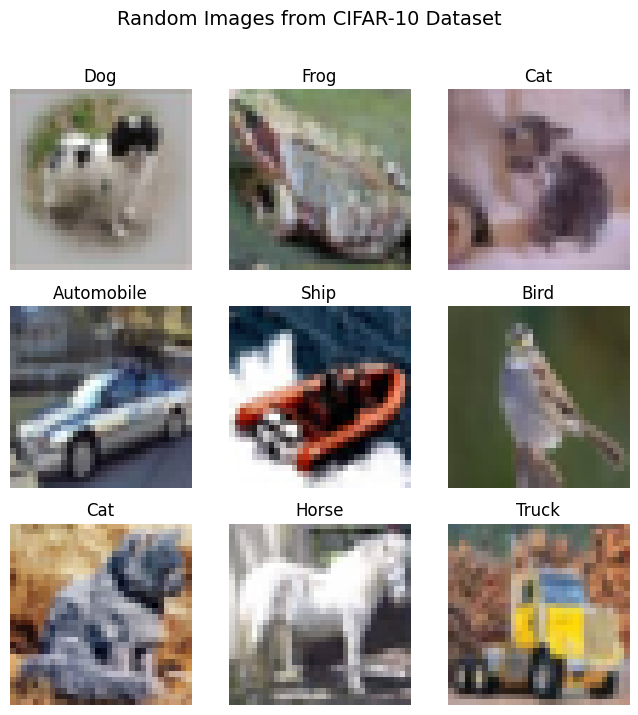

In [14]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')


# Define transformations (convert images to tensors and normalize)
transform = transforms.Compose([
    transforms.ToTensor()  # Convert images to PyTorch tensors (0-1 range)
])

# Load CIFAR-10 dataset
cifar10_dataset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)

# Create a DataLoader to sample images
data_loader = torch.utils.data.DataLoader(cifar10_dataset, batch_size=9, shuffle=True)

# Get a batch of images and labels
images, labels = next(iter(data_loader))

# Convert images from (C, H, W) to (H, W, C) for visualization
images = images.permute(0, 2, 3, 1).numpy()

# Define CIFAR-10 class names
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

# Plot 9 images in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])  # Show image
    ax.set_title(class_names[labels[i]])  # Show class name
    ax.axis("off")

plt.suptitle("Random Images from CIFAR-10 Dataset", fontsize=14)
plt.show()

## Mathematical Description of $X$ in CIFAR-10

In CIFAR-10, each image $ X $ is represented as a **random vector** rather than a single random variable.

#### Is $X$ a Random Variable or a Vector Random Variable?

- A **random variable (RV)** is typically a **scalar** that can take on different values according to a probability distribution.
- In CIFAR-10, an image $ X $ consists of **multiple pixel values** (each pixel has 3 RGB channels).
- Therefore, $ X $ is a **random vector** (or a **vector random variable**, RVV), meaning it has multiple components.

#### Mathematical Representation of $X$
Each CIFAR-10 image is a **vector-valued random variable**:
$$
X = (X_1, X_2, \dots, X_d) \in \mathbb{R}^d
$$
where:
- $ d = 32 \times 32 \times 3 = 3072 $ (since each image has 32×32 pixels with 3 color channels),
- Each $ X_i $ represents a single **pixel intensity** (ranging from 0 to 255),
- The entire vector $ X $ represents the full image.

Thus, **$ X $ is a high-dimensional random vector**.

### What Does "High-Dimensional" Mean?
- In standard probability, we often deal with **low-dimensional** variables (e.g., a coin flip with 2 outcomes or a dice roll with 6 outcomes).
- In CIFAR-10, $ X $ has **3072 dimensions** since each image is represented by 3072 pixel values.
- This makes probability estimation and modeling **complex** because we are working in a **3072-dimensional space**.

## What is Distribution $P(X)$

$ P(X) $ is the **probability distribution over the entire image space**. 

There are two main ways to think about it:

### **(a) Distribution Over Entire Images**
- $ P(X) $ models how **likely** a particular image $ X $ is in the dataset.
- If we could plot $ P(X) $, it would describe the frequency of different image structures.

### **(b) Distribution Over Individual Pixel Values**
- We can approximate $ P(X) $ by considering the **marginal distributions** of each component $ X_i $, i.e., the pixel intensities.
- For example, if we plot a **histogram of all pixel values**, we get an approximation of the **marginal probability distribution of pixel intensities**.

Mathematically, we can decompose:
$$
P(X) = P(X_1, X_2, \dots, X_{3072})
$$
which is extremely high-dimensional, so we often approximate it using:
- **Independent pixel distributions**: $ P(X) \approx \prod_{i} P(X_i) $ (which assumes pixels are independent),
- **Kernel Density Estimation (KDE)** to model the empirical pixel distribution.


#### One Example of $P(X)$

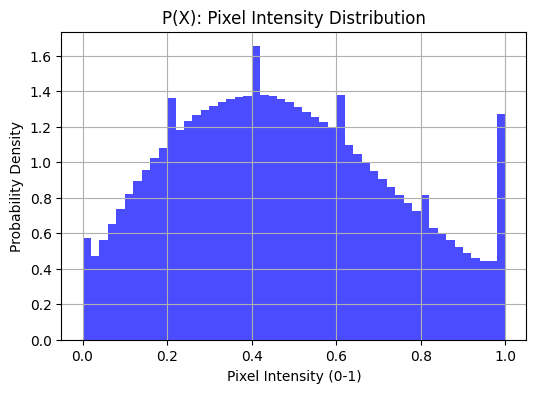

In [15]:
# Get all images and labels
data_loader = torch.utils.data.DataLoader(cifar10_dataset, batch_size=len(cifar10_dataset), shuffle=True)
images, labels = next(iter(data_loader))

# Convert images to numpy arrays
images = images.permute(0, 2, 3, 1).numpy()
labels = labels.numpy()

# P(X): Pixel intensity histogram
plt.figure(figsize=(6, 4))
plt.hist(images.flatten(), bins=50, density=True, color='blue', alpha=0.7)
plt.xlabel("Pixel Intensity (0-1)")
plt.ylabel("Probability Density")
plt.title("P(X): Pixel Intensity Distribution")
plt.grid()
plt.show()



## What is Distribution $ P(Y) $

$ P(Y) $ is **simpler** because CIFAR-10 has **only 10 possible classes** (airplane, automobile, etc.). Since the dataset is balanced:
$$
P(Y = y) = \frac{1}{10}, \quad y \in \{0,1,2,\dots,9\}
$$
Thus, $ P(Y) $ follows a **categorical distribution** over 10 labels.

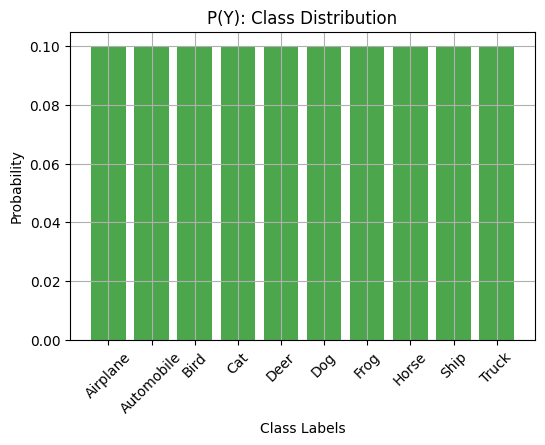

In [16]:
# P(Y): Class distribution
class_counts = np.bincount(labels, minlength=10)
class_probs = class_counts / len(labels)
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

plt.figure(figsize=(6, 4))
plt.bar(class_names, class_probs, color='green', alpha=0.7)
plt.xlabel("Class Labels")
plt.ylabel("Probability")
plt.title("P(Y): Class Distribution")
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Joint Distribution $ P(X, Y) $
The **joint distribution** $ P(X, Y) $ describes the probability of an image appearing **together with its label**. Mathematically:
$$
P(X, Y) = P(Y | X) P(X)
$$
which represents:
- How **likely** a particular image-label pair $(X, Y)$ is.
- How images are **distributed per class**.

For example, in CIFAR-10:
- $ P(X | Y = \text{“car”}) $ describes the distribution of images **given that the label is a car**.
- Different classes may have different image structures (e.g., sky in airplane images, roads in car images).

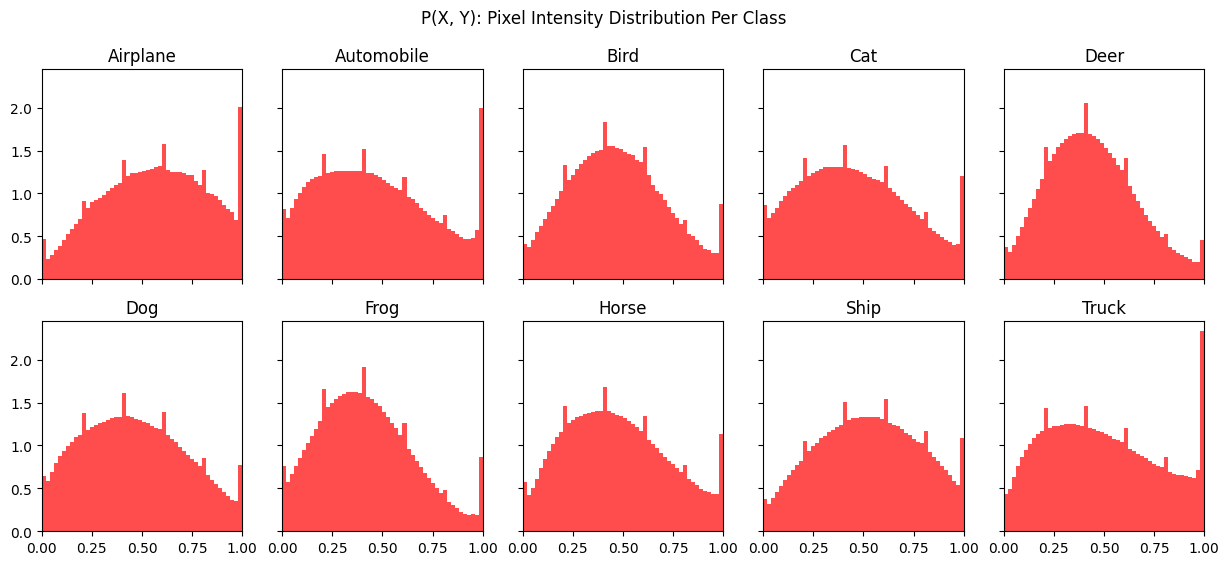

In [17]:
# P(X, Y): Pixel intensity distribution per class
fig, axes = plt.subplots(2, 5, figsize=(15, 6), sharex=True, sharey=True)
for i in range(10):
    class_images = images[labels == i].flatten()
    ax = axes[i // 5, i % 5]
    ax.hist(class_images, bins=50, density=True, alpha=0.7, color='red')
    ax.set_title(class_names[i])
    ax.set_xlim(0, 1)

fig.suptitle("P(X, Y): Pixel Intensity Distribution Per Class")
plt.show()

## Relationship Between These Distributions
Using the **chain rule of probability**, we can express:
$$
P(X, Y) = P(Y | X) P(X)
$$
or:
$$
P(X, Y) = P(X | Y) P(Y)
$$

- **$ P(Y | X) $**: The classifier’s goal → Predicting labels given an image.
- **$ P(X | Y) $**: Understanding what typical images look like for each class.

## Conditional Probabilities

In machine learning and probability theory, **$ P(X | Y) $** and **$ P(Y | X) $** represent different conditional distributions:

- **$ P(X | Y) $: The probability of an image given a class label.**
- **$ P(Y | X) $: The probability of a class label given an image.**

We consider that **$ P(X | Y) $ is the likelihood**, and **$ P(Y | X) $ is the posterior** in the context of Bayesian probability.

### $ P(X | Y) $ as the Likelihood

- **Definition:** The likelihood function $ P(X | Y) $ represents the probability of observing an image $ X $ **given** that it belongs to class $ Y $.
- **Intuition:** It answers:  
  *“If I know this image is a cat, what’s the probability of seeing this particular arrangement of pixels?”*
- **Why is it called likelihood?**  
  - In **Bayesian inference**, the likelihood measures how well a given class label $ Y $ explains the data $ X $.
  - If you assume that the dataset is generated according to some distribution, **$ P(X | Y) $ models how each class generates images**.
- **Example:**  
  - Suppose $ P(X | Y = \text{“Airplane”}) $ is **high** for images with blue sky and wings.
  - That means most airplane images tend to have blue and wing-like structures.

- **Corresponding Terms in Bayesian Notation:**  
  - $ P(H) = P(Y) $ → Prior probability of class $ Y $ (e.g., probability of an image being an airplane before seeing the image).  
  - $ P(E) = P(X) $ → Probability of an image appearing in the dataset.  
  - $ P(H | E) = P(Y | X) $ → Posterior probability (how likely the class is given the image).  
  - $ P(E | H) = P(X | Y) $ → Likelihood (how likely the image is given the class).  

### $ P(Y | X) $ as the Posterior
- **Definition:** The posterior probability $ P(Y | X) $ represents the probability of an image belonging to class $ Y $, **given** the image $ X $.
- **Intuition:** It answers:  
  *“Given this image, what’s the probability that it is an airplane?”*
- **Why is it called posterior?**  
  - In Bayesian reasoning, the **posterior is the probability after seeing the evidence (image $ X $)**.
  - It combines:
    - **Likelihood $ P(X | Y) $**: How likely is this image under class $ Y $?
    - **Prior $ P(Y) $**: How common is class $ Y $ in the dataset?
- **Example:**  
  - If an image contains blue and wings, then **$ P(X | Y = \text{Airplane}) $ is high**.
  - But if **airplanes are rare in the dataset** (i.e., $ P(Y = \text{Airplane}) $ is low), then the final probability $ P(Y | X) $ might be adjusted downwards.

- **Corresponding Terms in Bayesian Notation:**  
  - $ P(H) = P(Y) $ → Prior probability of the class.  
  - $ P(E) = P(X) $ → Probability of the image occurring in the dataset.  
  - $ P(H | E) = P(Y | X) $ → Posterior probability (how likely it is that the image belongs to a class given the image data).  
  - $ P(E | H) = P(X | Y) $ → Likelihood (how likely this specific image is given that it belongs to a certain class).  
  
### Relationship via Bayes' Theorem
Using **Bayes' Theorem**, we connect **likelihood** and **posterior**:

$$
\boxed{
P(Y | X) = \frac{P(X | Y) P(Y)}{P(X)}
}
$$

where:
- **$ P(Y | X) $**: Posterior (what we want in classification),
- **$ P(X | Y) $**: Likelihood (how well class $ Y $ explains $ X $),
- **$ P(Y) $**: Prior (how common class $ Y $ is in the dataset),
- **$ P(X) $**: Evidence (normalization factor, summing over all classes).

**Corresponding Bayesian Notation in terms of Hypothesis and Evidence**  

$$
\boxed{
P(H | E) = \frac{P(E | H) P(H)}{P(E)}
}
$$
where
- $ P(H | E) = P(Y | X) $ → Posterior: What we want to compute (classification).  
- $ P(E | H) = P(X | Y) $ → Likelihood: How well class $ Y $ explains $ X $.  
- $ P(H) = P(Y) $ → Prior: How common the class is in the dataset.  
- $ P(E) = P(X) $ → Evidence: Normalization factor (sum over all possible labels).  

### Bayes' Theorem in terms of Belief and Data

$$
\boxed{
P(\text{belief} | \text{data}) = \frac{P(\text{data} | \text{belief}) P(\text{belief})}{P(\text{data})}
}
$$
where:
- **$ P(\text{belief} | \text{data}) $ → Posterior probability**  
  - This is the updated probability of a hypothesis (belief) being true **after seeing data**.  
  - In machine learning, this can be $ P(Y | X) $, the probability of a class given an image.  

- **$ P(\text{data} | \text{belief}) $ → Likelihood**  
  - This tells us how well the observed data is explained by a given belief/hypothesis.  
  - In classification, it’s $ P(X | Y) $, the probability of an image appearing given its class.  

- **$ P(\text{belief}) $ → Prior probability**  
  - This is the probability of the belief/hypothesis **before seeing the data**.  
  - In machine learning, $ P(Y) $ represents how frequent a class is in the dataset.  

- **$ P(\text{data}) $ → Normalizing constant (Evidence)**  
  - This ensures the probabilities sum to 1.  
  - It’s computed by summing over all possible hypotheses:  
    $$
    P(\text{data}) = \sum_{H} P(\text{data} | H) P(H)
    $$  
  - In classification, this corresponds to summing over all class probabilities.

**How Does It Apply in Machine Learning?**

- Suppose we have an **image $ X $** and want to classify it as either **a cat ($ Y_1 $) or a dog ($ Y_2 $)**.
- Bayes' Theorem helps compute:
  $$
  P(Y_1 | X) = \frac{P(X | Y_1) P(Y_1)}{P(X)}
  $$
  - **Likelihood $ P(X | Y_1) $**: How likely is this image under the "cat" category?
  - **Prior $ P(Y_1) $**: How common are cats in the dataset?
  - **Normalization $ P(X) $**: Ensures probabilities sum to 1.


# Apply to Machine Learning

## Classification

For a classification task, a neural network **does not learn $ P(X) $ directly**, but rather it learns a function that estimates **$ P(Y | X) $**. This means it learns **the probability of a class label $ Y $ given an image $ X $**.

- The neural network learns a function **$ f_\theta(X) $** that maps images to class probabilities:
$$
f_\theta(X) \approx P(Y | X)
$$
- This is what enables classification: given a new image $ X $, the model predicts $ Y $.

### How Does the Neural Network Learn $ P(Y | X) $?

**Supervised Learning Objective**

- The model is trained using a dataset **$ \mathcal{D} = \{(X_i, Y_i)\}_{i=1}^{N} $** where:
  - $ X_i $ are the input images (3072-dimensional vectors for CIFAR-10),
  - $ Y_i $ are the class labels (one of 10 classes).

- The model optimizes a **loss function**, typically **cross-entropy loss**:
  $$
  L(\theta) = - \sum_{i=1}^{N} \sum_{c=1}^{10} \mathbb{1}(Y_i = c) \log f_\theta(X_i)_c
  $$
  - This encourages the neural network to output **high probabilities** for the correct class.


**What Is the Output of the Neural Network?**

Most deep learning models output a **vector of probabilities** over the 10 classes:
$$
f_\theta(X) = [P(Y = 0 | X), P(Y = 1 | X), ..., P(Y = 9 | X)]
$$
where each value represents the **confidence** of the model in each class.

- The **softmax activation function** ensures these probabilities sum to 1.

## Generative Task

Neural networks can **learn $ P(X) $ implicitly**, but **only in generative models**, such as:
- **Autoencoders (AEs)**
- **Variational Autoencoders (VAEs)**
- **Generative Adversarial Networks (GANs)**
- **Normalizing Flows**

These models explicitly model **$ P(X) $** to generate new images that look like real CIFAR-10 samples.
